<h1> ~~~ Introduction to Neural Networks ~~~  </h1>

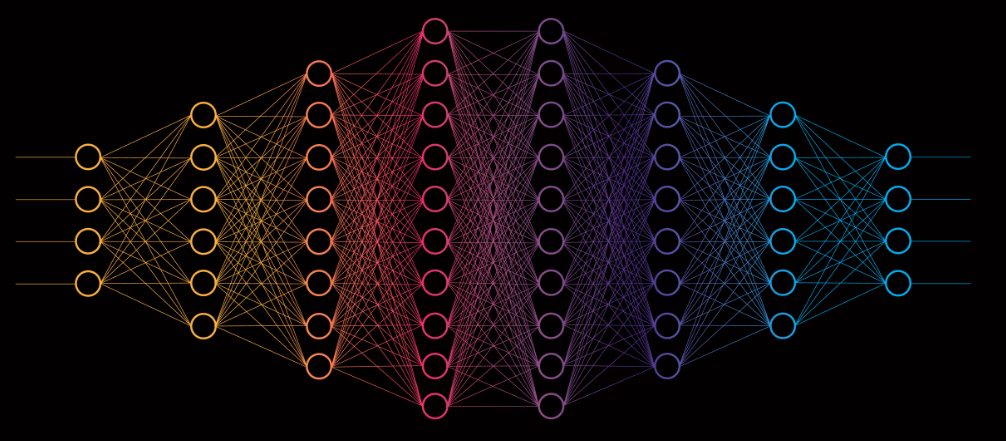


<div style="background-color: #5c5c5c; color: white; padding: 10px; border-radius: 5px;">

<h2>Table of Contents: </h2>

1. Introduction to Neural Networks, Perceptrons, and Deep Learning

2. Hidden layers 

3. Activation functions   
   a. Why we need activation functions  
   b. Examples of activation functions   

4. Backpropagation  
   a. What is backpropagation?  
   b. How do we backpropagate?   
      i.  Forward pass  
      ii. Backpropagation  
      iii. Updating the parameters  

5. Recap and future steps 

6. References

<h2> <span style="color: #f28f2c;"> 1. Introduction to Neural Networks, Perceptrons and Deep Learning. </span> </h2>

### *Neural* *networks* are a type of machine learning algorithm that draw inspiration from the anatomical structure and operations of the human brain.

### A brief history

The McCulloch-Pitts (MP) Neuron, technically the first neural network, was just a single neuron named after its neuroscientist and logician creators in 1943.
Interestingly, their primary goal was not applications like trend prediction, but rather to offer a mathematical explanation and logical representation for the intricate functioning of the brain and its potential to generate and seemingly learn complex patterns. And so, the MP Neuron had to intuitively reflect the structure of its biological analogue.

<div align=center>

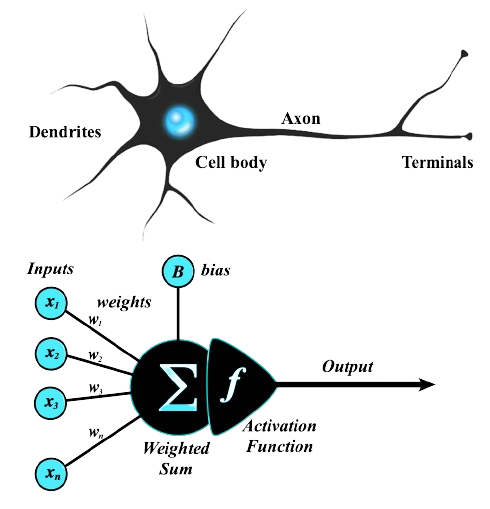

<i style = 'color: red; font-size: 13pt'> Figure 1. Structural comparison between a biological and artificial neuron.</i>

</div>

McCulloch and Pitts aimed to model the 'all-or-none' nature of a neuron's output, which is the purpose of binary classification tasks. The MP neuron represented an early effort to replicate binary decision-making in humans. However, it had a limitation: it could only process binary information. 

If the sum of these individual binary inputs exceeded a threshold or a condition checked by the function $f(x)$, the output of the MP neuron would be 1; otherwise, the output of the neuron would be 0. 

<div align=center>

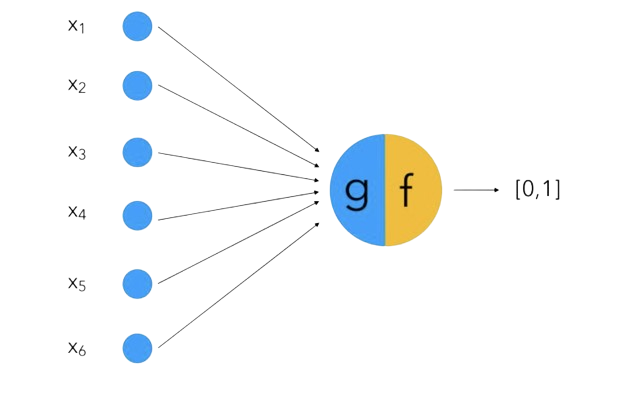

<i style = 'color: red; font-size: 13pt;'> Figure 2. Visualisation of a MP neuron.</i>

</div>

To address this challenge, Frank Rosenblatt, a psychologist, introduced the concept of a <span style = 'font-size:15pt; color : brown;'>'**Perceptron**'</span> in 1957, building upon the foundation of the MP neuron but expanding its capabilities to handle non-binary inputs. In this model, each **input** was assigned a distinct **weight**, and a weighted sum was calculated. This sum, along with a constant term known as a **bias**, was then subjected to the threshold function represented by $f(x)$. Similarly, if the summation exceeded zero, the output would be 1; otherwise, it would be 0.

<div align=center>

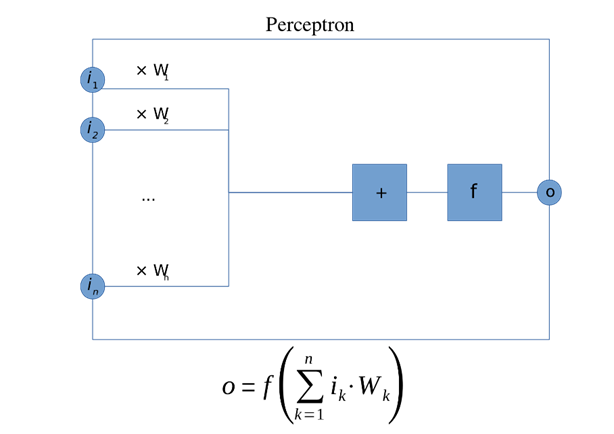

<i style = 'color: red; font-size: 13pt;'> Figure 3. Visualisation of a Rosenblatt Perceptron.</i>

</div>

This function is called the **step function** which is an example of an **Activation function**.
$$
f\left(x\right)= 
\begin{cases}
1 \quad if \ x>0 \\ 
0 \quad if \ x<0 \\ 
\end{cases} 
$$



 Activation functions take the linear combination or sum of the inputs and transforms it non-linearly, controlling how 'excited' or 'active' that neuron becomes depending on the value of the input. Two computer scientists, Seymour Papert and Marvin Minsky in 1969 formalized the strucuture of the Rosenblatt Pereceptron by replacing the **step function** with a generalised **activation function** that could be chosen adhoc.

### And thus the Perceptron as we know it today was born. 

<b>Note:</b> the words 'perceptron' and 'neuron' are often interchangably used to refer to the smallest individual unit of a neural network. But a perceptron sometimes also refers to the single layer neural network model popularized by Minsky and Papert.

Now that we have consolidated our theoretical understanding of a perceptron/neuron, let's build our first Neural Network to model logistic regression. This can be accomplished with just a Perceptron, the simplest neural network.

The relationship between multiple linear regression and logistic regression lies in the transformation of the weighted sum of input features: 
- Multiple linear regression predicts a continuous outcome, whereas 
- Logistic regression seeks to map this linear combination to a bounded [0, 1] output. 

Through a logistic or sigmoid function, logistic regression can effectively convert the linear prediction into a probability as shown in Notebook 1. This transformation makes logistic regression particularly valuable for binary classification tasks as the output can be interpreted as the likelihood of an observation belonging to a specific category or class. 

Logistic regression is able to map the linear sum to a scalar between 0 to 1 by using the **sigmoid activation function** as shown below:

$$ S(ζ) = \frac{1}{1 + e^{- ζ}} $$

where, ζ is the weighted sum calculated by the multiple linear regression equation. 

This function will always return a number between 0 and 1. The result can be interpreted as a 'True' classification when greater than 0.5 or 'False' when less than 0.5 as shown in figure 4 below where the value of the blue line is projected to the red line in accordance with the condition that is satisfied.

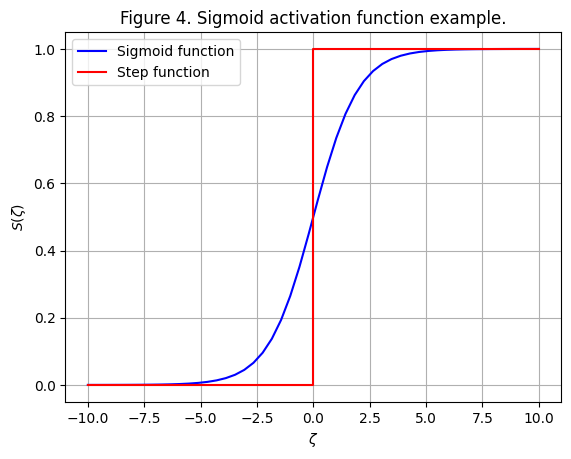

In [1]:
import matplotlib.pyplot as plt
import numpy as np


def sigmoid(x): 
    result = 1 + np.exp(-x)
    result = 1 / result
    return result

def step_function(x): 
    return np.where(x > 0, 1, 0)

x = np.linspace(-10,10,50)
y_sigmoid = sigmoid(x)
y_step = step_function(x)

# Plotting 
plt.figure()
plt.plot(x, y_sigmoid, label='Sigmoid function', color='b')
plt.step(x, y_step, where='mid', label='Step function', color='red')

plt.xlabel('$\zeta$')
plt.ylabel('$S(\zeta)$')
plt.title("Figure 4. Sigmoid activation function example.")
plt.legend()
plt.grid(True)
plt.show()

<div style="background-color: #b5863a; color: white; padding: 10px; border-radius: 5px;">

<b>Let us take a dataset, WeatherAUS.csv: </b>

We will then employ logistic regression to predict next-day rainfall in Australia, focusing on the RainTomorrow binary target utilizing meteorological features like MinTemp, MaxTemp, Rainfall, and RainToday (4 predictors to predict the RainTomorrow binary variable). 


The previous sections have provided a comprehensive understanding of the structure of a neural network, with a specific focus on the perceptron. However, the crucial question of how a neural network learns and makes predictions remains unanswered. The upcoming section will delve into the mechanisms and processes involved in the learning and prediction capabilities of neural networks.


Figure 5 below shows a schematic representation of the Perceptron Neural Network for this dataset and the logistic regression task:

<div align=center>

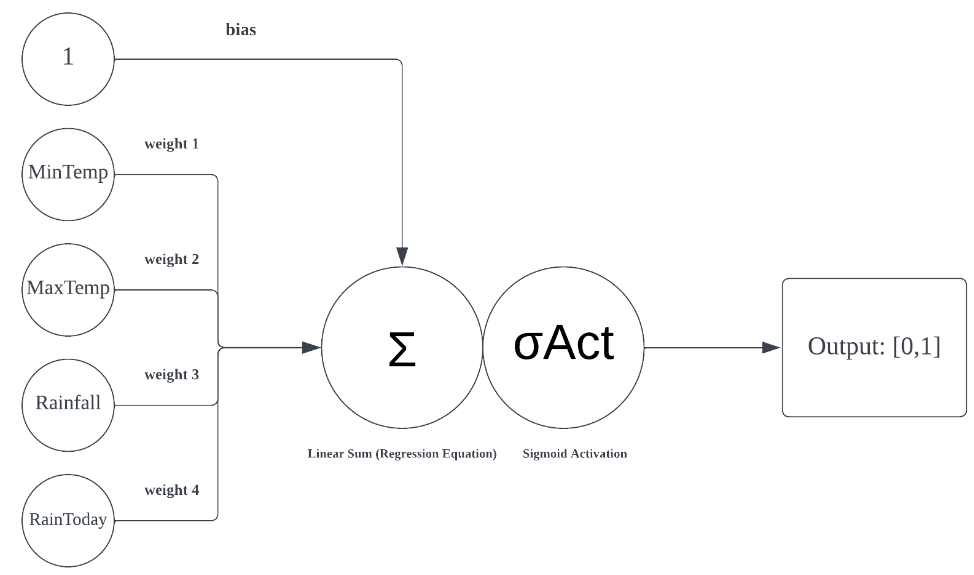

<b>Figure 5. Perceptron Neural Network schematic for the WeatherAUS dataset. 

</div>

From this, we can determine that the Linear Regression Equation $\zeta$ is given by the weighted sum of the individual inputs:  

$$ ζ = MinTemp * Weight1 + MaxTemp* Weight2 + Rainfall * Weight3 + RainToday * Weight4 + 1 * Bias $$

Remember that our goal with any predictive model, especially linear regression, is to learn and find the best values for the coefficients/weights [Weight1, Weight2, Weight3, Weight4]. $\zeta$ can also be represented as the dot product of the two input and weight matrices, with the bias term being added on after:

$$ζ = W^T \cdot X + b$$

where 
$$ X = \begin{bmatrix} MinTemp & MaxTemp & Rainfall & RainToday \end{bmatrix}, \quad 
W^T = \begin{bmatrix} Weight1 \\ Weight2 \\ Weight3 \\ Weight4 \end{bmatrix}, \quad
b = Bias*1 $$


In the context of neural networks, these coefficients are known as **weights**. The constant term in a linear regression model is known as **bias** and collectively, these are known as **parameters**. Simply put, the aim of a neural network is to arrive and 'learn' the ideal values of these parameters such that loss is minimized and accuracy of the model is maximized.

**An important distinction to be made between Linear Regression and Neural Networks is how they learn. Regression models learn their coefficient values through empirical methods like Ordinary Least Squares, where as Neural Networks learn their parameters through a process called Gradient Descent. (briefly mentioned in Notebook 1 Section 3f-ii)** This process will be covered in further detail in the following sections.

We will quickly introduce the term <b>backpropagation</b> and expand on it in the next section but for now, backpropogation can be interpreted as a mechanism integrated into machine learning models that enable them to reduce the error of the model over a certain number of iterations by slightly re-adjusting the parameters (weights and bias) values per iteration. This continual correction of error is called the **training phase** of a neural network. In the traning phase, the Neural Network learns and fits to the trends of the **training set**. Following training, we usually have 2 more partitions of the original dataset called the **validation set** and **test set**, each of which will be explained later.

For now, we will simulate the **training** and **testing** phase of this proposed model/architecture using Python in the following code snippets. Below is a Perceptron-Log-Regression model from scratch. This will show us exactly what steps a neural network takes to reduce loss over time.

### Importing necessary libraries for faster computations and increased range of math functions.

In [421]:
import pandas as pd
import numpy as np
import math
import random
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

### Reading the modified version of the WeatherAUS.csv dataset and loading it into memory. Then standardising the dataset and splitting it into training and testing set: 

In [463]:
data =pd.read_csv("out.csv")
data = data.dropna()
x = data.iloc[:,0:5]
y = data.iloc[:,-1].to_numpy()

x = x.iloc[:,1:]
scaler = StandardScaler(with_std=True)
new_X = scaler.fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(new_X,y, test_size=0.30)

print(x.shape)

(471, 4)


### Setting the parameters of the model (intializing the weights and bias to be a sample from a normal distribution of mean = 0 and std = 1)

In [423]:
epochs=1000     # Number of iterations 
lr = 0.001      # Learning rate 

bias = random.normalvariate(0,1)
w1 =random.normalvariate(0,1)
w2=random.normalvariate(0,1)
w3=random.normalvariate(0,1)
w4=random.normalvariate(0,1)
weights = np.array([w1,w2,w3,w4])
weights_vec = weights.reshape(4) ##good practice to force reshape into numpy array

In [424]:

def sigmoid(x):
    '''
    Robust sigmoid function that can handle a large domain of values effectively the same as the one mentioned above.
    '''
    if x >= 0:
        z = math.exp(-x)
        return 1 / (1 + z)
    else:
        z = math.exp(x)
        return z / (1 + z)
    
def BinaryCrossEntropy(y_true, y_pred): 
    '''
    Loss function to quantify how far away from the correct answer the prediction was.
    '''
    y_pred = np.clip(y_pred, 1e-7, 1 - 1e-7)
    term_0 = (1-y_true) * np.log(1-y_pred + 1e-7)
    term_1 = y_true * np.log(y_pred + 1e-7)
    return -(term_0+term_1)



In [ ]:
def forward_pass(d_vector):
    '''
    This is the forward pass of a neural network, here the linear sum is calculated with the current weights and input vector which then is 
    fed to the activation function (sigmoid, in our case) which then outputs a predicition.

    In the training phase, the final output of the forward pass is then used to calculate the loss and subsequently update the parameters (weights and bias)
    When the model used to predict, the output of the forward pass is just the final predicition.
    '''
    linear_sum = np.matmul(d_vector,weights_vec.T)+bias
    sigmoid_activated =  sigmoid(linear_sum)
    return sigmoid_activated

###  Training the Perceptron using Online Gradient Descent:

1. For each datapoint, load the **standardized predictors** into a (1,4) shaped vector.
2. Compute the forward pass to obtain a predicted probability.
3. Calculate the gradient of the error w.r.t each of the weights.
4. For each weight and bias, update the values by a factor of the `lr` *  -1 * gradient (-1 ensures we are moving towards the minimum of the loss function, the value of the parameters for which the error is the lowest)

$$
w_{new} = w_{old} - lr * \frac{\partial L}{\partial w}
$$

5. Repeat 1-4 for `epoch` times.


In [425]:
#lists to log the time series of loss
avg_loss_epoch= []
epochs_lin = np.linspace(0,epochs,epochs)


for e in range(epochs):
        avg_loss = 0
        for i in range(len(x_train)):

            #------FORWARD PASS AND LOSS GRADIENT CALCULATION------#
            d_vec = x_train[i] 
            a =forward_pass(d_vector=d_vec)
            y = y_train[i]
            grad = (a-y)*d_vec.T


            
            avg_loss+= BinaryCrossEntropy(y,a) ## This is just to log the loss decreasing as time goes on

            #------UPDATING PARAMETERS ------#
            for i in range(len(weights_vec)):
                updated =grad[i] * -lr
                weights_vec[i] += updated #Weights are updated
            bias += (a-y) * -lr  #Bias is updated

        ## This is just to log the loss decreasing as time goes on
        if e % 100 ==0: 
            print(f'Average BCELoss for epoch {e} is {avg_loss/len(x_train)}')
        avg_loss_epoch.append(avg_loss/len(x_train))


Average BCELoss for epoch 0 is 7.938467318224742
Average BCELoss for epoch 100 is 0.4997743778714289
Average BCELoss for epoch 200 is 0.44562980924880047
Average BCELoss for epoch 300 is 0.43279823763335495
Average BCELoss for epoch 400 is 0.43094234785550467
Average BCELoss for epoch 500 is 0.4307294999655255
Average BCELoss for epoch 600 is 0.4306969294817969
Average BCELoss for epoch 700 is 0.4306897039925342
Average BCELoss for epoch 800 is 0.43068777798590846
Average BCELoss for epoch 900 is 0.43068722612774957


### Making predictions on the test dataset

In [426]:
correct=0
for i in range(len(x_test)):
        pred = forward_pass(x_test[i])
        if(np.round(pred)==y_test[i]):
            correct+=1

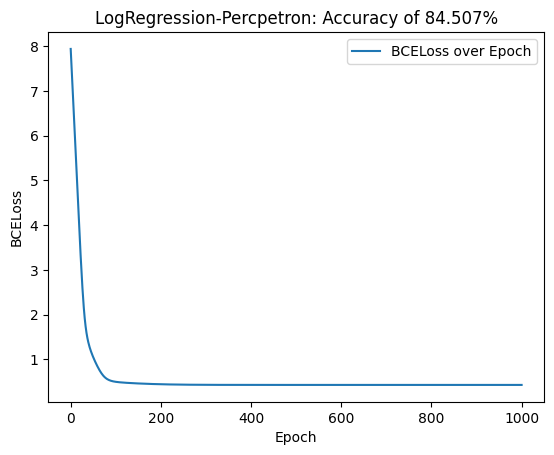

In [427]:
plt.plot(epochs_lin,avg_loss_epoch)
plt.legend({'BCELoss over Epoch'})
plt.ylabel('BCELoss')
plt.xlabel('Epoch')
plt.yscale('linear')
plt.title(f'LogRegression-Percpetron: Accuracy of {np.round((correct/len(x_test)*100),3)}%')
plt.show()

### Final values of the weights and bias we get:

In [436]:
print(f"Weights: {weights_vec.tolist()} \n Bias = {bias}")

Weights: [1.208404784745497, -1.081803244266224, 0.25194505047005955, 0.42800139825844674] 
 Bias = -1.5137349336942643


<h2> <span style="color: #f28f2c;"> 2. Hidden layers </span> </h2>

It is worth nothing that a perceptron has the ability to only spearate linearly-related datasets. If the predictors of a dataset have a non-linear association with the target, you will need to feed the output of one neuron to others. Data seen in real life is typically not as straight forward and requires multiple neurons feeding into each other as shown in the figure below. This increases the lateral depth of a neural network making it a **deep neural network** and each vertical segment of neurons can be thought about as a layer. 

More specifically, each additional hidden layer in a neural network allows the model to extract and learn increasingly complex features and patterns from the input data, producing a model that is capable of making accurate predictions on a general, diversified sample of data. Remember that these models are expected to be able to make predictions based on unseen data samples; hence, they need to recognise and learn complex patterns with existing reference material to 'build up an intuition' and make accurate predictions. 

<div align=center>

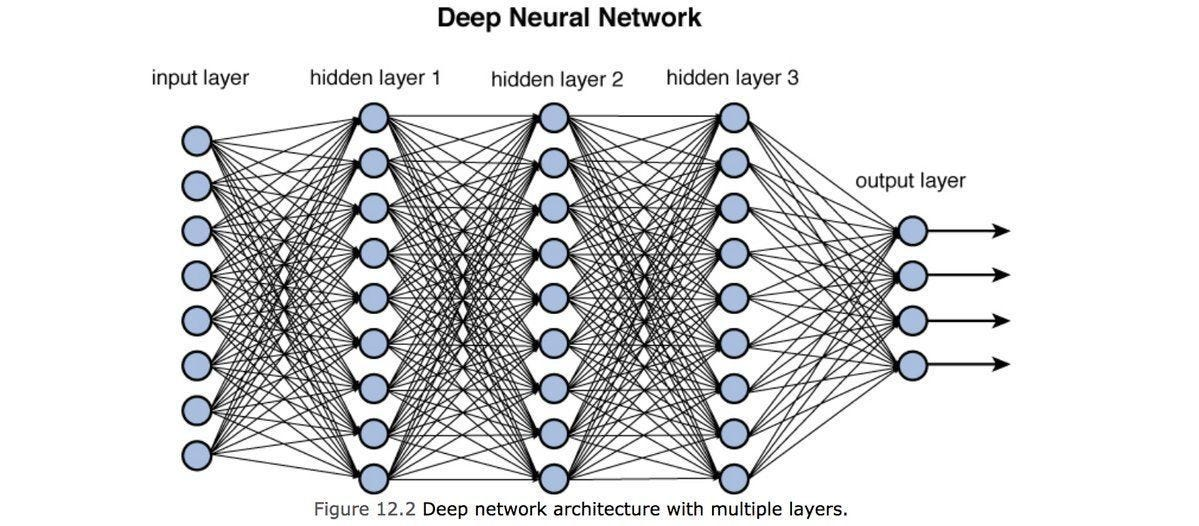

</div>

The figure above displays a neural network with 3 hidden layers (in addition to the input and output layers) where each of layers are one independent perceptron that may be connected to another perceptron layer before and/or after it.

<h2> <span style="color: #f28f2c;"> 3. Activation functions </span> </h2>

<h4> <span style="color: #f28f2c;"> 3a. Why we need activation functions </span> </h4>

Now that we know adding hidden layers is beneficial, the important questions that must be answered are:

> 1) <b>Can we add any number of hidden layers?</b>  
> 
> No. This can cause a decrease in the accuracy of the model and can also cause overfitting if too many layers are added. So, it is important to add 'the right' number of layers which is determined by trial-and-error.
> 
> If you want to know more about it, here are some of the resources you can use.  
> - For a quick overview, consider having a look at the following thread on stack exchange: [link](https://stats.stackexchange.com/questions/338255/what-is-effect-of-increasing-number-of-hidden-layers-in-a-feed-forward-nn)
> - If you want to dive deeper, then you can refer to Chapter 5 of the Deep Learning book: [link](https://www.deeplearningbook.org/) 



> 2) <b>Can we stack two hidden layers back-to-back?</b> 
>  
> The short answer is no; but we can still produce the effect of two hidden layers by converting the linear input signals to non-linear input signals. 

Let’s look at what happens if we have the two hidden layers side by side. We know that the output of a hidden layer in an MLP is a matrix given by $Z$: 

$$
Z = W^T \cdot x + b 
$$

Now let’s assume that we have 2 hidden layers, $Z_1$ and $Z_2$, stacked back-to-back in their respective order, and assume bias is zero for simplicity: 

$$
Z_1 = W_1^T \cdot x_1 \quad and \quad Z_2 = W_2^T \cdot x_2 
$$

When we substitute $Z_1$ as the input into $Z_2$, we obtain the following: 

$$
Z_2 = W_2^T \cdot Z_1 \rightarrow Z_2 = W_2^T \cdot (W_1^T \cdot x_1) 
$$

We know that $W_2^T \cdot W_1^T = (W_2 \cdot W_1)^T$ and we can represent this to be some other matrix $W_3 = (W_2 \cdot W_1)^T$. With this, our equation for $Z_2$ can be collapsed to: 

$$
Z_2 = W_3^T \cdot x_1
$$

<div style="background-color: #784ca6; color: white; padding: 10px; border-radius: 5px;">

Now, if we compare the equation of $Z_2$ that we have to the general equation of a perceptron model, notice that they are exactly the same. 

<b>What does that mean conceptually?</b> 
When we stack 2 hidden layers back-to-back, the resulting output of the 2nd hidden layer will be the same as having one layer but with a different weight matrix. In other words, stacking 2 layers back-to-back is the same as having 1 layer and having the second one is redundant. 

<b>So, what can we do to reap the benefits of using more hidden layers?</b>
We put Activation functions in between these hidden layers. Activation functions are functions used in a neural network to compute the weighted sum of inputs and biases, which is in turn used to decide whether a neuron can be activated or not. They are differentiable operators for transforming input signals to outputs, while most of them add nonlinearity [1].

Here’s another website that covers the basics: [link](https://www.analyticsvidhya.com/blog/2021/04/activation-functions-and-their-derivatives-a-quick-complete-guide/) 

</div>

<h4> <span style="color: #f28f2c;"> 3b. Examples of activation functions </span> </h4>

Some examples of activation functions include: 

<div align=center>

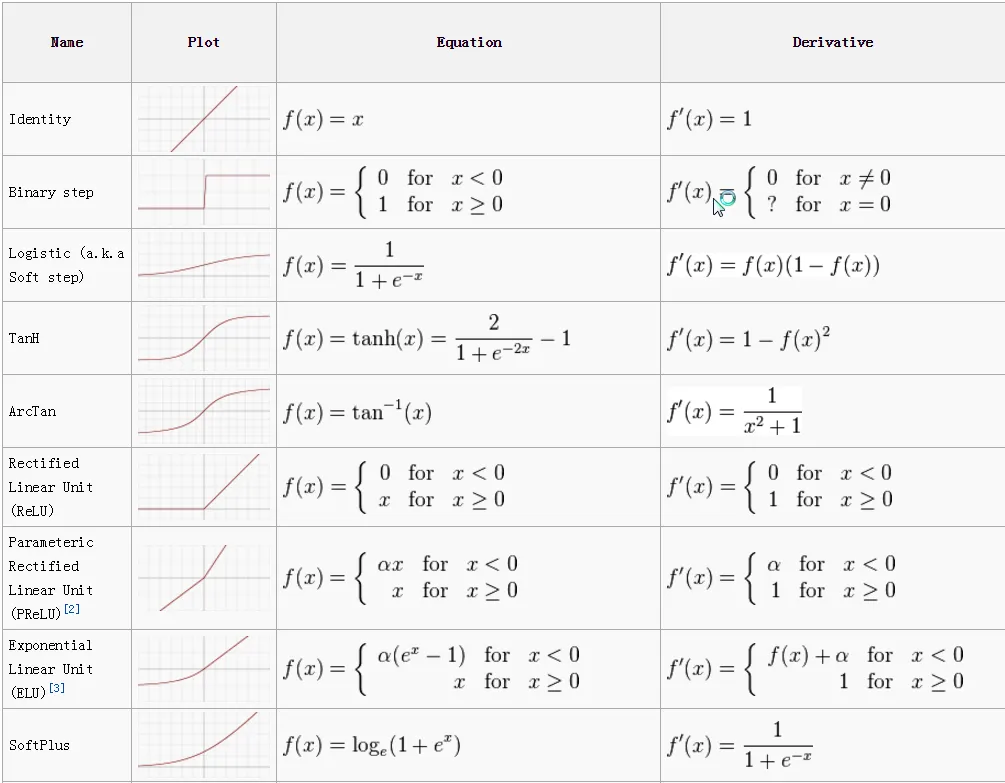

<b><i>Figure 8. Examples of activation functions. </i></b>

</div>

<b>It's nice knowing we have all of these activation functions, but how do we know which one to use for our specific case? </b>

Picking the right activation function is subjective and changes on a case-by-case basis. The most used ones are ReLU and sigmoid and we will briefly explain these next; however, when optimising a neural network, we would want to try different activation functions, compare their relative performances, and pick the more accurate one. 


<b>ReLU: $f(x) = max (0, x)$ </b>

- For all negative values of x, the output will be zero   
- For all the other values (positive values including zero), the output will be x.

ReLU is generally preferred over the other activation functions for the following reasons.
- Computational Simplicity 
  - It requires a simple max function which is easier to implement as opposed to other activation functions; requires less computation and is cheaper to execute as fewer operations are required [4]. 
- Representational Sparsity 
  - Due to its ability to produce a true zero, it can accelerate the learning process and simplify the model [4].
- Linear Behaviour
  - We can hugely reduce the risk of vanishing gradient [4].

More info about the advantages can be found here: [link](https://proceedings.mlr.press/v15/glorot11a)



<b>Sigmoid: $f(x) = 1/ (1+ exp(-x))$ </b>

- The range of the output is (0,1). It is important to remember that the output can only approach the values 0,1 but can never be 0 or 1.

Here are some of the advantages of using a sigmoid function:
- As the values are between 0 and 1 the confidence of the model can easily be estimated [5].
- It gives a smooth gradient by removing discontinuities in output values [5]. 

For more information, you can also look at the website: [link](https://www.analyticsvidhya.com/blog/2021/04/activation-functions-and-their-derivatives-a-quick-complete-guide/)

<h2> <span style="color: #f28f2c;"> 4. Backpropagation </span> </h2>

So far, we have only discussed about how we can feed data into our models in order to generate a prediction - which is known as the <b>forward propagation or forward pass</b> phase of the model. We have also briefly introduced how we can calculate the overall loss and accuracy of the model per epoch (in Notebook 1 and the coding example in Notebook 2 Section 1). 

But how does our neural network build upon these processes to 'learn' and achieve more accurate predictions? This is where <b>backpropagation</b> comes into play. 

<h4> <span style="color: #f28f2c;"> 4a. What is backpropagation? </span> </h4>

<div align=center>

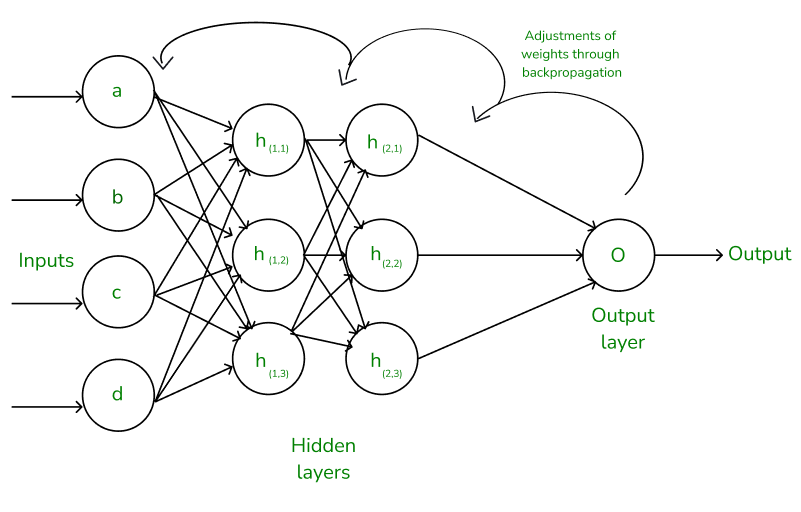

<b><i>Figure 9. Visualisation of where backpropagation comes into play. </i></b>

</div>

During forward pass, we feed our input data through the first hidden layer of the model, feed these results through the second hidden layer, and so on until we arrive at the final output layer where our prediction is generated along with the loss/error. If the error after the forward pass in an epoch is high, this implies that the network did not learn properly. This is because the set of weights and biases are not optimized enough for accuracy. Hence, we need to improve the accuracy of our model's predictions by updating the value of these weights and that is where backpropagation comes in handy [6].  

<b>Backpropagation (or backward pass)</b> is an algorithm that aims to calculate the gradient of the loss function with respect to each of the neural network's parameters: i.e., $\frac{\partial L}{\partial w_1}$, $\frac{\partial L}{\partial w_2}$, up to $\frac{\partial L}{\partial w_n}$. This is conducted in the reverse fashion to forward pass where we move backwards through the network (as hinted in its name), calculating gradients from the output layer to the input layer. 

The partial derivatives from one layer are reused to calculate the partial derivatives of the previous layer (left as we are moving from right to left during backpropagation), resulting in a flow of information connecting the loss of the model to each of the parameters. In other words, we can efficiently calculate the gradient at each layer relative to one another, as opposed to calculating the gradient of each layer separately. 

<h4> <span style="color: #f28f2c;"> 4b. How do we backpropagate? </span> </h4>

<div style="background-color: #de8d2a; color: white; padding: 10px; border-radius: 5px;">

<b>Disclaimer:</b> you may wish to skip this section since it is fairly calculus heavy. As long as you are aware that a neural network uses two algorithms (forward pass and backpropagation) to generate predictions and minimise its loss, that will suffice. 

Nowadays, we have automatic differentiation implemented in deep learning algorithms to calculate complex gradients and allow us to focus on improving other aspects of our models; however, an understanding of how these gradients are calculated (not a very pretty process we must say) is essential to understand how neural networks operate, where problems may be occurring, and how you can improve them. 

</div>

We previously mentioned that computing the gradients with respect to weights that are located in the 'next' hidden layer are achieved by using the gradients with respect to weights in the 'previous' hidden layer. If you are familiar with the chain rule from calculus, this might be a bit more intuitive from the form of the equation: 

$$
\frac {\partial L}{\partial x} = \frac {\partial L}{\partial O} \times \frac {\partial O}{\partial h_{2}} \times \frac {\partial h_{2}}{\partial h_{1}} \times \frac {\partial h_1}{\partial x}
$$


<b>The example below was taken from a MLOps Blog, A Comprehensive Guide to the Backpropagation Algorithm in Neural Networks by Ahmed Gad on Neptune.ai </b>
[(link here)](https://neptune.ai/blog/backpropagation-algorithm-in-neural-networks-guide).

How backpropagation works is best explained based on a simple network, like the one given in figure 10 below which has the following properties: 
- One input layer with 2 inputs: $X_1$ and $X_2$ 
- One output layer with 1 output 
- No hidden layers
- The weights of the inputs are $W_1$ and $W_2$ which are applied to $X_1$ and $X_2$ respectively
- The bias is treated as a new input neuron to the output neuron which has a fixed value +1 and a weight b. 

<div align=center>

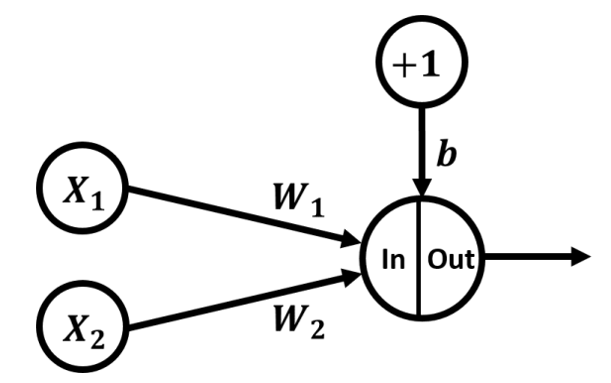

<b>Figure 10. Simple perceptron model example. Adapted from [Ahmed Gad, Practical Computer Vision Applications Using Deep Learning with CNNs, 978-1484241660. 2018, Apress]</b>

</div>

Let’s assume that the output layer uses the sigmoid activation function defined by the following equation:

$$\sigma(s)=\frac{1}{1+e^{-s}}$$

Where s is the weighted sum of products (SOP) between each input and its corresponding weight: $s=X_1*W_1+ X_2*W_2+b$

To make things simple, a single training sample is used in this example. The next table shows the single training sample input values ($X_1,X_2$) and the actual/desired output for the sample $y$. The current values of the weights and biases are included in the table below, as well as in figure 11 below: 

| X1  | X2  | y   | W1 | W2 | b |
| --- | --- | --- | -- | -- | - |
| 0.1 | 0.3 | 0.03| 0.5| 0.2|1.83|

<br>

<div align=center>

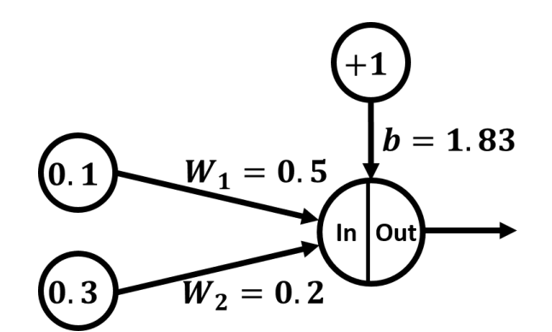

<b>Figure 11. Updated simple perceptron model with parameter values.</b>

</div>


<h4> <span style="color: #f28f2c;"> 4b (i) Forward pass </span> </h4>

<div style="background-color: #de8d2a; color: white; padding: 10px; border-radius: 5px;">

Remember that the purpose of backpropagation is to compute the partial derivativies of the loss with respect to the weight values. Hence, we need to actually generate our prediction first and obtain a value for the loss which is a process all of you are hopefully able to identify now: forward pass. 
1. Pass the input values through each of the layers of the model (multiply weights and add any biases)
2. Pass the result through any activation functions 
3. Calculate the loss 

</div>

We just need to work through the schematic in figure 11 above to obtain our final output: 
- $X_1$ is multiplied by $W_1$ to give $W_1X_1$
- $X_2$ is multiplied by $W_2$ to give $W_2X_2$
- We add the inputs together along with the bias term to receive the weighted sum of products (SOP) as previously shown: 
$$ s = W_1 \cdot X_1 + W_2 \cdot X_2 + b = (0.5)(0.1) + (0.2)(0.3) + 1.83 \\ \therefore s = 1.94 $$  

Next, we pass this value through the sigmoid activation function to obtain our generated prediction from the model: 

$$ 
\sigma(s) = \frac{1}{1+e^{-s}} \rightarrow \sigma(1.94) = \frac{1}{1+e^{-1.94}} \\ 
\therefore \sigma(s) = 0.8744
$$

Referring to the table in the previous section, our desired output value was $0.03$ which is clearly different to our generated prediction of $0.8744$. We can 'mathematically measure how accurate our prediction is' by using a loss function such as the <b>squared error function</b> where $y$ is the theoretical output and $\hat{y}$ is our prediction: 

$$ 
\text{Squared error, L} = \frac{1}{2} (y - \hat {y})^2 = \frac{1}{2}(0.03 - 0.8744)^2 = 0.3566 \\
\therefore L = 0.3566  
$$

<b>Note:</b> the $\frac{1}{2}$ was included in the calculation to simplify derivative calculations during backpropagation later.  

The loss function interprets how close the predicted output is to the desired output. Clearly, we have a loss value of $0.3566$ which we need to minimise but how? This is the stage of our model where backpropagation takes over to update the weights and biases. Using the backpropagation algorithm, we can determine how much each weight impacts the final loss value, that is, the effect of each weignt on the prediction error and which of these parameters need increasing or decreasing?


<h4> <span style="color: #f28f2c;"> 4b (ii) Backpropagation </span> </h4>

We briefly mentioned at the start of section 4b how calculating the derivatives of the prediction error with respect to each parameter is achieved by the <b>multivariate chain rule</b>. Let's find the chain relating the prediction error to the weights. 

The prediction error $L$ was given by: 
$$
L = \frac{1}{2} (y - \hat{y})^2
$$

Looking back at figure 11, we calculated the SOP $s$, passed this through the $\sigma(s)$ function to obtain $\sigma$, and passed this through the loss function to obtain $L$. Hence, our 'predicted' $\hat{y}$ value is the same as $\sigma$ which means we can calculate the gradient of the loss $L$ with respect to $\sigma$: $ \frac {\partial L}{\partial \sigma}$

We have previously mentioned that we passed our sum of products through the $\sigma$ function i.e., $\sigma(s)$. Hence, can find the partial derivative of $\sigma$ with respect to $s$: $\frac {\partial \sigma}{\partial s}$

Finally, the sum of products was calculated by summing the weighted inputs and bias values. Hence, we can find the partial derivatives of the SOP, $s$ with respect to each weight, $W_1$ and $W_2$: $\frac {\partial s}{\partial W_1}$ and $\frac {\partial s}{\partial W_2}$

<div style="background-color: #de8d2a; color: white; padding: 10px; border-radius: 5px;">

<b>What have we done?</b> 

We have worked backwards from our forward pass stage, calculating the gradients of the right-most layers with respect to their inputs until we arrived at the input layer. In doing so, we have essentially produced our multivariate chain rule, which can be seen by writing out each of the derivatives we just calculated in order and multiplying them out: 

$$
\frac {\partial L}{\partial \sigma}, 
\frac {\partial \sigma}{\partial s}, 
\frac {\partial s}{\partial W_1}, and 
\frac {\partial s}{\partial W_2}
$$

If we wanted to find the impact of changing $W_1$ on the loss, we can write out the chain rule as such: 

$$
\frac {\partial L}{\partial W_1} = 
\frac {\partial L}{\partial \sigma} \times 
\frac {\partial \sigma}{\partial s} \times 
\frac {\partial s}{\partial W_1} 
$$

Or for $W_2$, we have: 

$$
\frac {\partial L}{\partial W_2} = 
\frac {\partial L}{\partial \sigma} \times 
\frac {\partial \sigma}{\partial s} \times
\frac {\partial s}{\partial W_2} 
$$

</div>

<b>Important note:</b> we used the derivative chain solution because there was no direct equation relating the error and the parameters together. But, we can create an equation relating them and applying partial derivatives directly to it:

$$
E = \frac{1}{2}(y - \frac{1}{1+e^{-(X_1W_1+ X_2W_2+b)}})^2
$$

Because this equation seems complex to calculate the derivative of the error W.R.T the parameters directly, it’s preferred to use the multivariate chain rule for simplicity.

#### Calculating partial derivatives values by substitution

Let’s calculate the partial derivatives of each part of the chain we created:

<b>For the derivative of the error W.R.T the predicted output:</b>

$$ 
\frac{\partial L}{\partial \sigma} 
= \frac{\partial}{\partial \sigma}\left(\frac{1}{2}(y - \sigma)^2\right) 
= 2 \cdot (-1) \cdot \frac{1}{2}(y - \sigma) 
= \sigma - y \\
\therefore \frac{\partial L}{\partial \sigma} = \sigma - y
$$

- Substituting in the known values ($\sigma=0.8744$ and $y=0.03$):

$$
\frac{\partial L}{\partial \sigma} = 0.8744 - 0.03 = 0.8444 
$$



<b>For the derivative of the predicted output W.R.T the SOP:</b>

$$
\frac{\partial \sigma}{\partial s} 
= \frac{\partial}{\partial s} \left( \frac{1}{1+e^{-s}}\right)
$$ 

Remember: the quotient rule can be used to find the derivative of the sigmoid function and simplified into the following form below:

$$
\frac{\partial \sigma}{\partial s} 
= \frac{e^{-s}}{(1+e^{-s})^2}
= \sigma(s)(1-\sigma(s))
$$

- Substituting in the known values ($\sigma=0.8744$):

$$
\frac{\partial \sigma}{\partial s} = (0.8744)(1 - 0.8744) = 0.1098 
$$



<b>For the derivative of SOP W.R.T $W_1$:</b>

$$
\frac{\partial s}{\partial W_1} 
= \frac{\partial}{\partial W_1} \left(W_1X_1 + W_2X_2 + b\right)
= (1 \cdot (W_1)^{1-1})(X_1) + 0 + 0 = X_1
$$

- Substituting in the known values ($X_1 = 0.1$):

$$
\frac{\partial s}{\partial W_1} = 0.1
$$



<b>Similarly for the derivative of SOP W.R.T $W_2$:</b>

$$
\frac{\partial s}{\partial W_2} 
= \frac{\partial}{\partial W_2} \left(W_1X_1 + W_2X_2 + b\right)
= 0 + (1 \cdot (W_2)^{1-1})(X_2) + 0 = X_2
$$

- Substituting in the known values ($X_2 = 0.3$):

$$
\frac{\partial s}{\partial W_2} = 0.3 
$$

The numbers are currently everywhere so let's make a quick summary of our results: 

| Partial derivative                   | Value  |
|--------------------------------------|--------|
| $\frac{\partial L}{\partial \sigma}$ | 0.8444 | 
| $\frac{\partial \sigma}{\partial s}$ | 0.1098 | 
| $\frac{\partial s}{\partial W_1}$    | 0.1    | 
| $\frac{\partial s}{\partial W_2}$    | 0.3    |


After calculating the individual derivatives in all chains, we can multiply all of them to calculate the desired derivatives (i.e. the derivative of the error W.R.T each weight). 

For the derivative of the error W.R.T $W_1$:

$$
\frac {\partial L}{\partial W_1} = 
\frac {\partial L}{\partial \sigma} 
\frac {\partial \sigma}{\partial s}  
\frac {\partial s}{\partial W_1} 
= 0.8444 \times 0.1098 * 0.1 = 0.00928 \\
\therefore \frac {\partial L}{\partial W_1} = 0.00928
$$

For the derivative of the error W.R.T $W_2$:

$$
\frac {\partial L}{\partial W_2} = 
\frac {\partial L}{\partial \sigma} 
\frac {\partial \sigma}{\partial s}  
\frac {\partial s}{\partial W_2} 
= 0.8444 \times 0.1098 * 0.3 = 0.02782 \\
\therefore \frac {\partial L}{\partial W_2} = 0.02782
$$

<h4> <span style="color: #f28f2c;"> 4b (iii) Updating the parameters </span> </h4>

<div style="background-color: #de8d2a; color: white; padding: 10px; border-radius: 5px;">

Great, we have these two values corresponding to the partial derivatives of our loss function with respect to the two weights; but what do these values mean? 

<b>Remember what a partial derivative or gradient function is:</b> they tell you how much the dependent variable (the loss) will change when we make a small change in the independent variable (the weights). Hence, as $0.02 > 0.009$, this means that the loss will change more drastically when $W_2$ is updated in comparison to $W_1$ as it has a larger gradient. 

Ultimately, our goal is to make the gradients with respect to each of the weights equal to zero such that the loss function does not change if you make a small change to each parameter. To minimise the loss, we want to adjust the weight parameters in the opposite direction of their gradients (move in the positive direction if we have a negative gradient, or the negative direction if we have a positive gradient). We briefly mentioned this in Notebook 1 at the end when introducing Gradient Descent which is one of the most common methods used to update the model parameters: 

$$
W_{new} \leftarrow W_{old} - \eta \cdot \nabla L(W_i)
$$

where: 
- $W_i$ is the parameter 
- $\eta$ is the learning rate hyperparameter (how much you adjust the weight value)
- $\nabla L(W_i)$ is the gradient of the loss with respect to the parameter $W_i$ 

</div>


<h2> <span style="color: #f28f2c;"> 5. Recap and future steps </span> </h2>

Congratulations on making it to the end of this notebook. The concepts in this notebook were definitely not easy to get through but they are fundamental towards understanding how neural networks can be utilized to produce machine learning models that will ultimately facilitate the world of medical imaging. In this notebook, we have discussed: 
-	An overview of the McCulloch-Pitts’ Neuron and the early Perceptron before branching into more complex Neural Networks  
-	Building a Perceptron Neural Network for logistic regression
-	The impact of hidden layers in producing deep neural networks 
-	Why we need activations functions between hidden layers and the different types of activation functions to choose from
-	The three main stages of a neural network: 
    - Forward pass, 
    - Backpropagation, and
    - Gradient descent




<div style="background-color: #de8d2a; color: white; padding: 10px; border-radius: 5px;">

<b>So what is the next step? </b>

A quick reminder of Monash AIM’s mission statement: 

<center><i>To create imaging solutions that will help with the diagnosis and treatment of medical conditions through interdisciplinary cooperation. </i></center>

Before we ever start training a neural network model to perform a specific task, the very first thing we need to do is understand the nature of the data that we are working with. You might be exhausted after learning about the neural network architecture in this Notebook; however, this is only preparing us for the journey that is the wonderful multitude of neural networks that have been developed to perform specific tasks. There will not be a single neural network model that is compatible with all problems and consequently, we will need to carefully choose one over others based on its advantages and limitations. 

</div>

In our case, the data that we will be feeding into our neural networks are medical images which are viewed by computers as 2D arrays (image height by image width) where each element has an associated pixel value. With our current Perceptron toolbox, we should be able to perform image classification to detect whether a patient displays specific medical conditions. However, a major drawback to our Perceptron model is the fact that our image is flattened into a flat 1D vector at the very start of our model. As a result, we will most likely lose all notion of spatial information (how neighbouring pixels in the image interact with one another), leading to less accurate training and results. 

Instead of flattening our 2D image into a vector of pixel values, we want to preserve and handle our 2D image in its current array form. This can be achieved by a form of neural network called a <b>Convolutional Neural Network (CNN),</b> which will be the focus of our discussion in Notebook 3.  

Despite moving on to a more advanced and relevant neural network model, the Perceptron model still serves as a strong foundation for understanding and optimizing CNNs as well as other deep learning models. CNNs and their convolutional operations provide a neural network model that: 
- Learns features of an image in a hierarchical manner whilst preserving the spatial information in the image  
- Reduces the computational demands (resources used) during training 
- Sensitively detects features in an accurate manner whilst remaining invariant to variations in the data being presented 

<div align=center>

{Throw in GITHUB permalink to Notebook 3 when finalised}

</div>

References  

[1] Quinn, J. et al. (2020b) Dive into deep learning: tools for engagement. Thousand Oaks, California: Corwin, a SAGE Company, p. Chapter 5, Section 5.1.  
[2] SHARMA, S. (2017) Activation Functions in Neural Networks, Medium. Towards Data Science. Available at: https://towardsdatascience.com/activation-functions-neural-networks-1cbd9f8d91d6.  
[3] Unit 6.4 - Choosing Activation Functions (no date) Lightning AI. Available at: https://lightning.ai/courses/deep-learning-fundamentals/unit-6-overview-essential-deep-learning-tips-tricks/unit-6.4-choosing-activation-functions/ (Accessed: 11 March 2024).  
[4]  Brownlee, J. (2019) A Gentle Introduction to the Rectified Linear Unit (ReLU) for Deep Learning Neural Networks, Machine Learning Mastery. Available at: https://machinelearningmastery.com/rectified-linear-activation-function-for-deep-learning-neural-networks/.  
[5] https://www.analyticsvidhya.com/blog/2021/04/activation-functions-and-their-derivatives-a-quick-complete-guide/